In [321]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [322]:
df = pd.read_csv("Sepsis_Cases_Log.csv")

In [323]:
df = df.drop(columns=['org:group', 'Complete Timestamp', 'Variant', 'Variant index', 'Diagnose', 'lifecycle:transition'])

In [340]:
df.head(30)

,Case ID,Activity,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,...,DiagnosticUrinaryCulture,SIRSCritLeucos,Oligurie,DiagnosticLacticAcid,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,Leucocytes,CRP,LacticAcid
0,A,ER Registration,True,True,True,True,True,True,True,True,...,True,False,False,True,False,True,True,NaN,NaN,NaN
1,A,Leucocytes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6,NaN,NaN
2,A,CRP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN
3,A,LacticAcid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2
4,A,ER Triage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,A,ER Sepsis Triage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,A,IV Liquid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,A,IV Antibiotics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,A,Admission NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,A,CRP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0,NaN


In [325]:
df_act_flow = pd.DataFrame()

# Loop through each unique Case ID
for case in df['Case ID'].unique():
    # Filter the data for the current Case ID
    case_data = df[df['Case ID'] == case]
    
    # Extract the activities as a list
    activity_flow = case_data['Activity'].tolist()
    
    # Add the Case ID as the first column and the activities as subsequent columns
    row_data = [case] + activity_flow
    
    # Append the row to the final DataFrame
    df_act_flow = pd.concat([df_act_flow, pd.DataFrame([row_data])], ignore_index=True)

# Rename columns: first column as 'Case ID', remaining columns as 'Activity 1', 'Activity 2', etc.
columns = ['Case ID'] + [f'Activity {i+1}' for i in range(df_act_flow.shape[1] - 1)]
df_act_flow.columns = columns

# Inspect the resulting DataFrame
print(df_act_flow.head(10))



  Case ID       Activity 1  Activity 2        Activity 3      Activity 4  \
0       A  ER Registration  Leucocytes               CRP      LacticAcid   
1       B  ER Registration   ER Triage               CRP      LacticAcid   
2       C  ER Registration   ER Triage  ER Sepsis Triage      Leucocytes   
3       D  ER Registration   ER Triage  ER Sepsis Triage             CRP   
4       E  ER Registration   ER Triage  ER Sepsis Triage       IV Liquid   
5       F  ER Registration   ER Triage  ER Sepsis Triage      Leucocytes   
6       G  ER Registration   ER Triage  ER Sepsis Triage       IV Liquid   
7       H  ER Registration   ER Triage  ER Sepsis Triage             CRP   
8       I  ER Registration   ER Triage  ER Sepsis Triage  IV Antibiotics   
9       J  ER Registration   ER Triage  ER Sepsis Triage             CRP   

       Activity 5        Activity 6      Activity 7      Activity 8  \
0       ER Triage  ER Sepsis Triage       IV Liquid  IV Antibiotics   
1      Leucocytes  ER

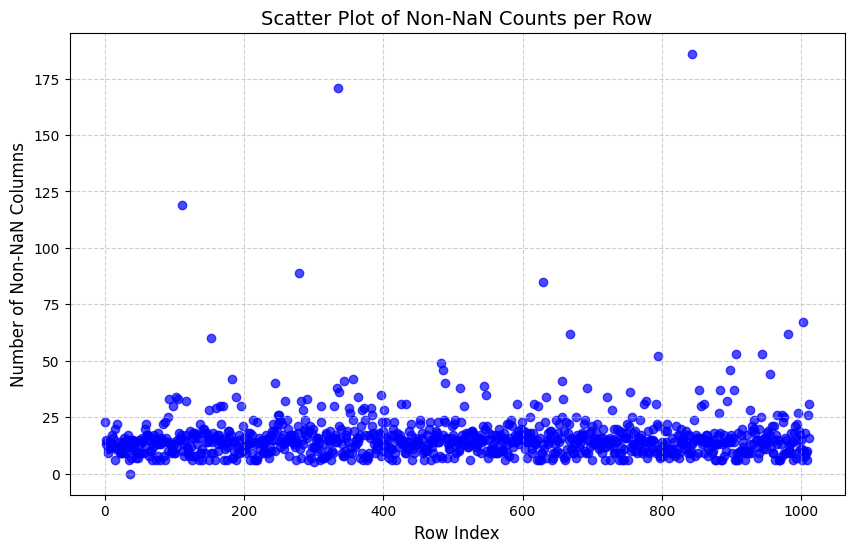

In [326]:

# Step 1: Count the number of non-NaN values for each row
df_act_flow['Non-NaN Count'] = df_act_flow.notnull().sum(axis=1)

# Step 2: Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_act_flow.index, df_act_flow['Non-NaN Count'], alpha=0.7, color='blue')
plt.title('Scatter Plot of Non-NaN Counts per Row', fontsize=14)
plt.xlabel('Row Index', fontsize=12)
plt.ylabel('Number of Non-NaN Columns', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [371]:
# Step 1: Count the number of non-NaN values for each row
df_act_flow['Non-NaN Count'] = df_act_flow.notnull().sum(axis=1)

# Step 2: Filter rows to keep only those with Non-NaN Count <= 50
df_act_flow_filtered = df_act_flow[df_act_flow['Non-NaN Count'] <= 30]

# Step 3: Drop the 'Non-NaN Count' column as it is no longer needed
df_act_flow_filtered = df_act_flow_filtered.drop(columns=['Non-NaN Count'])

# Display the filtered DataFrame
df_act_flow_filtered.head()


,Case ID,Activity 1,Activity 2,Activity 3,Activity 4,Activity 5,Activity 6,Activity 7,Activity 8,Activity 9,...,Activity 176,Activity 177,Activity 178,Activity 179,Activity 180,Activity 181,Activity 182,Activity 183,Activity 184,Activity 185
0,A,ER Registration,Leucocytes,CRP,LacticAcid,ER Triage,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B,ER Registration,ER Triage,CRP,LacticAcid,Leucocytes,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C,ER Registration,ER Triage,ER Sepsis Triage,Leucocytes,CRP,IV Liquid,IV Antibiotics,Admission NC,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D,ER Registration,ER Triage,ER Sepsis Triage,CRP,LacticAcid,Leucocytes,IV Liquid,IV Antibiotics,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E,ER Registration,ER Triage,ER Sepsis Triage,IV Liquid,CRP,Leucocytes,LacticAcid,IV Antibiotics,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [372]:
# Step 4: Keep only the first 52 columns
df_act_flow_filtered = df_act_flow_filtered.iloc[:, :30]

# Display the updated DataFrame
df_act_flow_filtered.head()


,Case ID,Activity 1,Activity 2,Activity 3,Activity 4,Activity 5,Activity 6,Activity 7,Activity 8,Activity 9,...,Activity 20,Activity 21,Activity 22,Activity 23,Activity 24,Activity 25,Activity 26,Activity 27,Activity 28,Activity 29
0,A,ER Registration,Leucocytes,CRP,LacticAcid,ER Triage,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,CRP,Leucocytes,Release A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B,ER Registration,ER Triage,CRP,LacticAcid,Leucocytes,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C,ER Registration,ER Triage,ER Sepsis Triage,Leucocytes,CRP,IV Liquid,IV Antibiotics,Admission NC,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D,ER Registration,ER Triage,ER Sepsis Triage,CRP,LacticAcid,Leucocytes,IV Liquid,IV Antibiotics,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E,ER Registration,ER Triage,ER Sepsis Triage,IV Liquid,CRP,Leucocytes,LacticAcid,IV Antibiotics,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [373]:
df_act_flow_filtered.shape

(949, 30)

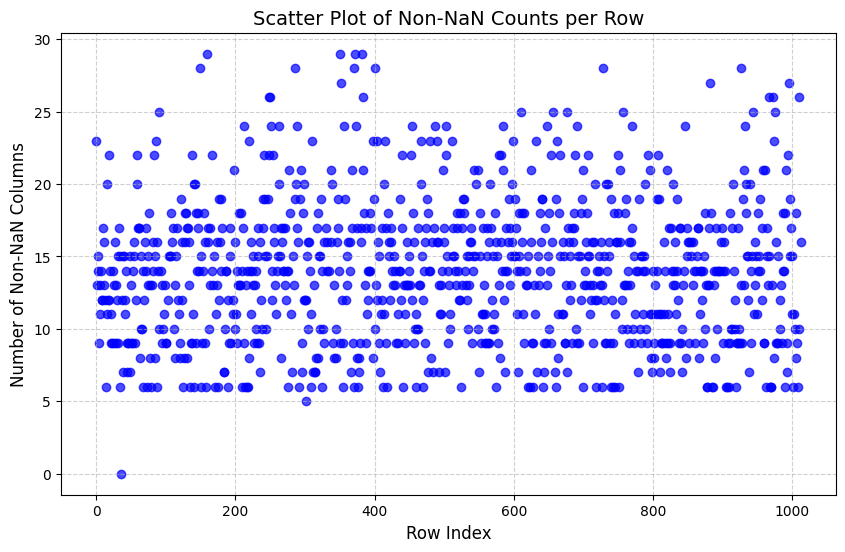

In [374]:

# Step 1: Count the number of non-NaN values for each row
df_act_flow_filtered['Non-NaN Count'] = df_act_flow_filtered.notnull().sum(axis=1)

# Step 2: Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_act_flow_filtered.index, df_act_flow_filtered['Non-NaN Count'], alpha=0.7, color='blue')
plt.title('Scatter Plot of Non-NaN Counts per Row', fontsize=14)
plt.xlabel('Row Index', fontsize=12)
plt.ylabel('Number of Non-NaN Columns', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [375]:
# Filter the DataFrame to include only rows where Activity == 'ER Registration'
df_er_registration = df[df['Activity'] == 'ER Registration']

# Reset index for cleanliness (optional)
df_er_registration = df_er_registration.reset_index(drop=True)

df_er_registration.shape

(1013, 28)

In [376]:
df_other_attributes = df_er_registration.drop(columns=['Activity', 'Leucocytes', 'CRP', 'LacticAcid'])
df_other_attributes.head()

,Case ID,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,Age,...,SIRSCriteria2OrMore,DiagnosticXthorax,SIRSCritTemperature,DiagnosticUrinaryCulture,SIRSCritLeucos,Oligurie,DiagnosticLacticAcid,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG
0,A,True,True,True,True,True,True,True,True,85.0,...,True,True,True,True,False,False,True,False,True,True
1,B,True,True,False,True,False,True,True,False,45.0,...,True,True,True,True,False,False,True,False,True,True
2,C,True,True,False,False,False,True,True,True,55.0,...,True,False,True,True,False,False,True,False,True,True
3,D,True,True,False,True,False,True,True,True,70.0,...,True,True,True,False,False,False,True,False,False,True
4,E,True,True,False,True,False,True,True,True,75.0,...,True,True,True,True,False,False,True,False,True,True


In [377]:
df_diagnosis = df[['Case ID', 'Activity','Leucocytes', 'CRP', 'LacticAcid']]
df_diagnosis = df_diagnosis.dropna(subset=['Leucocytes', 'CRP', 'LacticAcid'], how='all', ignore_index=True)
df_diagnosis.head(20)

,Case ID,Activity,Leucocytes,CRP,LacticAcid
0,A,Leucocytes,9.6,NaN,NaN
1,A,CRP,NaN,21.0,NaN
2,A,LacticAcid,NaN,NaN,2.2
3,A,CRP,NaN,109.0,NaN
4,A,Leucocytes,8.7,NaN,NaN
5,A,Leucocytes,9.6,NaN,NaN
6,A,CRP,NaN,47.0,NaN
7,A,Leucocytes,10.7,NaN,NaN
8,A,CRP,NaN,15.0,NaN
9,A,CRP,NaN,9.0,NaN


In [378]:
df_act_flow_filtered.to_csv('Sepsis_Activity_Flow.csv', index=False)
df_other_attributes.to_csv('Sepsis_Other_Attributes.csv', index=False)
df_diagnosis.to_csv('Sepsis_Diagnosis.csv', index=False)

In [379]:
# Merge datasets on 'Case ID'
merged_df = (
    df_act_flow_filtered
    .merge(df_diagnosis, on="Case ID", how="left")
    .merge(df_other_attributes, on="Case ID", how="left")
)

# Display a summary of the merged dataset
merged_df.head()


,Case ID,Activity 1,Activity 2,Activity 3,Activity 4,Activity 5,Activity 6,Activity 7,Activity 8,Activity 9,...,SIRSCriteria2OrMore,DiagnosticXthorax,SIRSCritTemperature,DiagnosticUrinaryCulture,SIRSCritLeucos,Oligurie,DiagnosticLacticAcid,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG
0,A,ER Registration,Leucocytes,CRP,LacticAcid,ER Triage,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,True,True,True,True,False,False,True,False,True,True
1,A,ER Registration,Leucocytes,CRP,LacticAcid,ER Triage,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,True,True,True,True,False,False,True,False,True,True
2,A,ER Registration,Leucocytes,CRP,LacticAcid,ER Triage,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,True,True,True,True,False,False,True,False,True,True
3,A,ER Registration,Leucocytes,CRP,LacticAcid,ER Triage,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,True,True,True,True,False,False,True,False,True,True
4,A,ER Registration,Leucocytes,CRP,LacticAcid,ER Triage,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,True,True,True,True,False,False,True,False,True,True


In [380]:
merged_df.to_csv('Sepsis_Merged_Dataset.csv', index=False)